In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from collections import Counter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from collections import Counter
dataset_dir = '../../data/'

train_dir = dataset_dir + 'train/'
valid_dir = dataset_dir + 'valid/'
test_dir = dataset_dir + 'test/'


In [2]:
train_dataset = image_dataset_from_directory(
      train_dir,
      image_size=(180, 180),
      batch_size=32)

def get_top_tags():
    class_names = train_dataset.class_names

    train_labels = np.concatenate([y for _, y in train_dataset])

    class_counter = Counter(train_labels)

    top_tags = [class_names[class_index] for class_index, _ in class_counter.most_common(3)]
    
    return top_tags

Found 84635 files belonging to 525 classes.


In [3]:
def generate_flow(data_dir, included_classes):
  # normalize the images
  image_data_generator = ImageDataGenerator(rescale=1.0/255.0)

  return image_data_generator.flow_from_directory(
      data_dir,
      target_size=(180, 180),
      batch_size=32,
      class_mode='categorical',
      shuffle=True,
      classes=included_classes
  )

In [ ]:
        # Display the image
        plt.figure()
        # Ensure images are properly rescaled for display
        plt.imshow(image)  # Rescale back to the original range
        class_name = included_classes[label]  # Get class name using index
        plt.title(f"Class: {class_name}")
        plt.axis("off")
        plt.show()

In [16]:
included_classes = get_top_tags()

train_generator = generate_flow(train_dir,included_classes)

valid_generator = generate_flow(valid_dir, included_classes)

test_generator = generate_flow(test_dir, included_classes)

print(train_generator.class_indices)


Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
{'RUFOUS TREPE': 0, 'HOUSE FINCH': 1, 'OVENBIRD': 2}


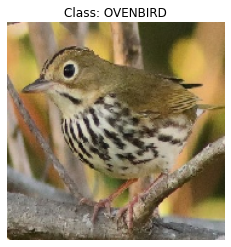

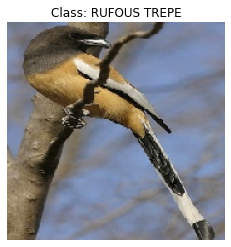

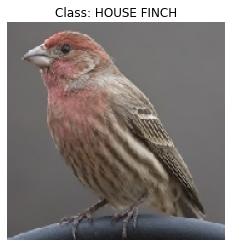

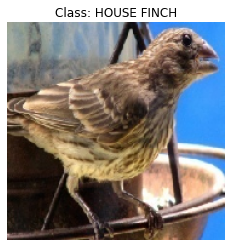

In [17]:
for batch_images, batch_labels in train_generator:

    for i in range(len(batch_images)):
        if i > 3:
            break
        label = np.argmax(batch_labels[i])  

        plt.figure()
        plt.imshow(batch_images[i])
        class_name = included_classes[label]
        plt.title(f"Class: {class_name}")
        plt.axis("off")
        plt.show()

        i += 1
    if i > 3:
            break